https://github.com/spmallick/learnopencv/tree/master/SVM-using-Python/Non-Linear-Data

# 파이썬으로 SVM using Scikit-Learn

This post explains the implementation of Support Vector Machines (SVMs) using Scikit-Learn library in Python. We had discussed the math-less details of SVMs in the earlier [post](https://www.learnopencv.com/support-vector-machines-svm/).

In this post, we will show the working of SVMs for three different type of datasets:

1. Linearly Separable data with added noise
2. Non-linear separable data with added noise

# Prerequisites
Before we begin, we need to install sklearn and matplotlib modules. This can be done using pip.

We first import matplotlib.pyplot for plotting graphs. We also need svm imported from sklearn. Finally, from sklearn.model_selection we need train_test_split to randomly split data into training and test sets, and GridSearchCV for searching the best parameter for our classifier. The code below shows the imports.

# Linearly separable data with noise
Let’s look at a slightly more complicated case shown in Figure 3 where it is not possible to linearly separate the data, but a linear classifier still makes sense. Note that no matter what you do some red points and some blue points will be on the wrong side of the line.


In [31]:
import sys, os
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import pandas as pd

# sys.path.append(os.path.abspath("../"))
# from utils import read_data, plot_data, plot_decision_function

# Read data
df1 = pd.read_csv("./input/points_class_0.txt", delimiter=' ', header=None)
df2 = pd.read_csv("./input/points_class_1.txt", delimiter=' ', header=None)

In [58]:
pieces = {0: df1,1: df2}
result = pd.concat(pieces).reset_index()
result.drop('level_1', axis = 1, inplace = True)
result.columns = ['label','x','y']
result.head()

,label,x,y
0,0,13.675403,309.2250
1,0,11.905645,198.7875
2,0,14.560282,151.2875
3,0,51.725202,173.8500
4,0,75.616935,202.3500


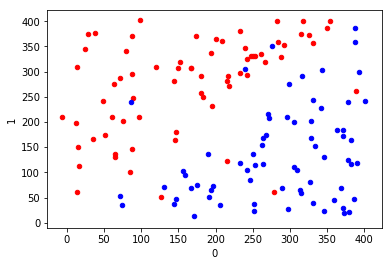

In [59]:
ax = df1.plot.scatter(x = 0, y = 1, color = 'red')
df2.plot.scatter(x = 0, y = 1, color = 'blue', ax = ax)

The question now is which line to choose? SVM provides you with parameter called C that you can set while training. In scikit-learn, this can be done using the following lines of code.

If you set C to be a low value (say 1), the SVM classifier will choose a large margin decision boundary at the expense of larger number of misclassifications. When C is set to a high value (say 100), the classifier will choose a low margin decision boundary and try to minimize the misclassifications. This is shown in Figure 4. The margin is the shown using dotted lines — the larger the space between the dotted lines, the larger is the margin.


In [62]:
# Split data to train and test on 80-20 ratio
x = result.drop('label', axis = 1)
labels = result.label
X_train, X_test, y_train, y_test = train_test_split(x,labels, test_size = 0.2, random_state=42)
 
# Plot traning and test data
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(110, 2) (110,) (28, 2) (28,)


In [72]:
# Create a linear SVM classifier 
clf = svm.SVC(kernel='linear')

# Train classifier 
clf.fit(X_train, y_train)

# # Make predictions on unseen test data
# y_pred = clf.predict(X_test)
# print("Accuracy: {}%".format(clf.score(y_test, y_pred) * 100 ))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

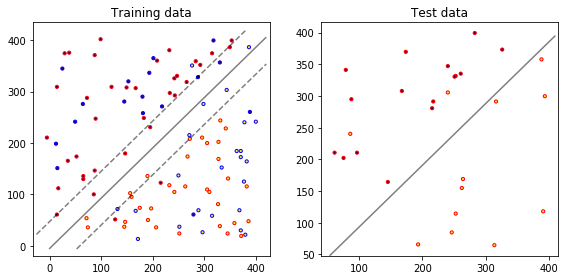

In [76]:
def plot_decision_function_helper(X, y, clf, show_only_decision_function = False):
    color_function = {0: "r", 1: "b"}
    colors = result["label"].map(lambda x: color_function.get(x))
    plt.axis('equal')
    plt.tight_layout()
    #plt.axis('off')

    plt.scatter(X['x'], X['y'], c = y, s = 10, edgecolors=colors)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    if  show_only_decision_function:
        # Plot decision boundary
        ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5,
        linestyles=['-'])
    else :
        # Plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
        linestyles=['--', '-', '--'])

def plot_decision_function(X_train, y_train, X_test, y_test, clf):
    plt.figure(figsize=(8, 4))
    plt.subplot(121)
    plt.title("Training data")
    plot_decision_function_helper(X_train, y_train, clf)
    plt.subplot(122)
    plt.title("Test data")
    plot_decision_function_helper(X_test, y_test, clf, True)
    plt.show()
    
plot_decision_function(X_train, y_train, X_test, y_test, clf)